In [5]:
#To load automatically updates from libraries without re-running import cells
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


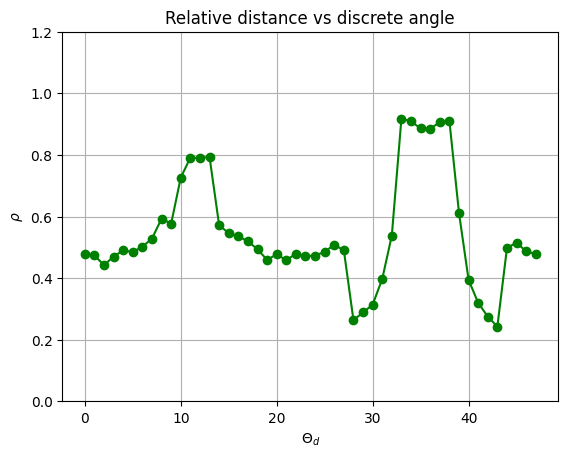

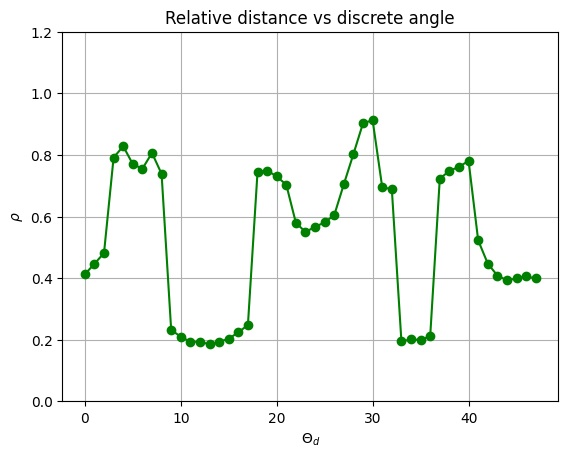

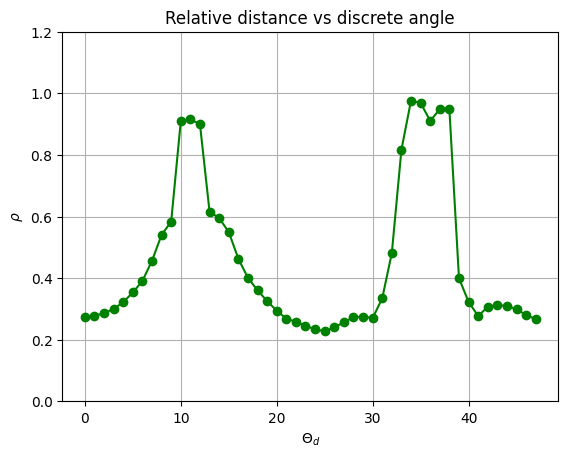

[0.7060337289451014, 0.2885194277935678]


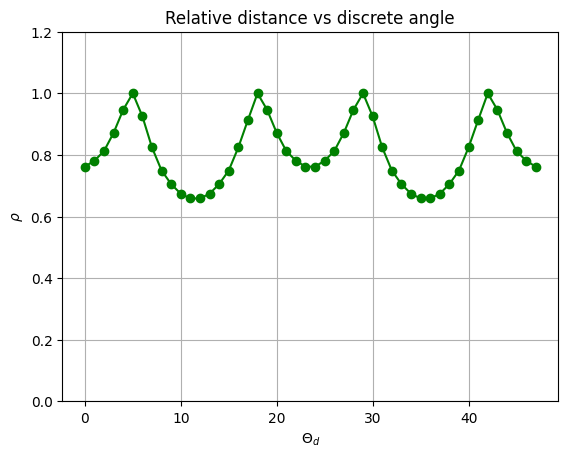

[0.5011666226426066, 0.5109253094704392]


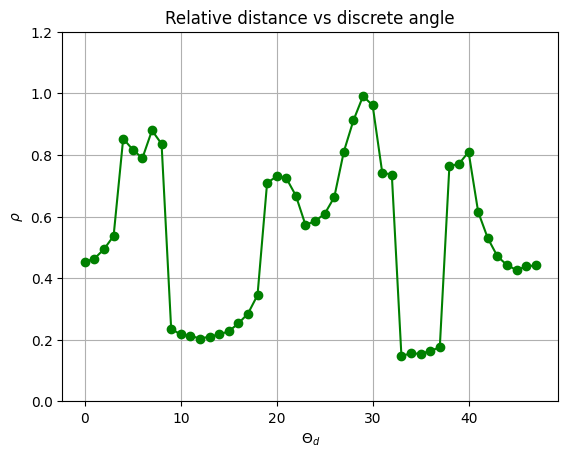

[0.45207515967427425, 0.8676305393043963]
[{'color': [0, 255, 0], 'coords_data': (49, 25, 100, 348), 'label': 'person', 'confidence': 0.8001442482591918}, {'color': [0, 255, 0], 'coords_data': (178, 181, 177, 181), 'label': 'dog', 'confidence': 0.960289018503743}]


In [21]:
import cv2
import numpy as np
from multi_shape_detector import MultiShapeDetector
from segmentation_utils import draw_detection_bound_boxes
from segmentation_utils import get_clusters_from_grayscale_image
from segmentation_utils import plot_array

# Load the test image
# image = cv2.imread(f"man_with_dog_and_square.png", cv2.IMREAD_GRAYSCALE)
image = cv2.imread(f"man_with_dog_and_square.png", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (400, 400), interpolation=cv2.INTER_AREA)

# Extraxct the object pixels from image
grouped_clusters = get_clusters_from_grayscale_image(image)


# Define human shape image for detector init
human_shape_image = cv2.imread(f"human_shape.png", cv2.IMREAD_GRAYSCALE)
human_detect_params = {
    "label": "person",
    "detect_thresh": 0.6,
    "sigm_params": (0.65, 10),
    "rotations_enabled": False,
    "reflections_enabled": False,
}

# Define dog shape image for detector init
dog_shape_image = cv2.imread(f"dog_shape.png", cv2.IMREAD_GRAYSCALE)
dog_detect_params = {
    "label": "dog",
    "detect_thresh": 0.75,
    "sigm_params": (0.65, 10),
    "rotations_enabled": False,
    "reflections_enabled": False,
}

# Init multi-shape detector
multi_shape_detector = MultiShapeDetector(
    [human_shape_image, dog_shape_image], [human_detect_params, dog_detect_params]
)

shapes_contour_functions = multi_shape_detector.shapes_contour_functions

for shape in shapes_contour_functions:
    plot_array(shape, x_lim = None, y_lim =(0, 1.2))

# Testing pixel clusters 
detections_data = []
for cluster in grouped_clusters:

    contour_function, (x_min, y_min, width, height) = multi_shape_detector.get_contour_function_from_segm_pixel_list(cluster)
    plot_array(contour_function, x_lim = None, y_lim =(0, 1.2))
    cluster_box_data = multi_shape_detector.compare(cluster)
    if len(cluster_box_data) > 0:
        detections_data.append(cluster_box_data)

print(detections_data)

# Draw detection result boxes on image
detect_boxes_image = draw_detection_bound_boxes(image, detections_data)

# # Display the result
# cv2.imshow("Image", detect_boxes_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()